<a href="https://colab.research.google.com/github/Only-Mike/DeepLearning-and-AI/blob/main/Group%20Assigment1/GroupAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# We have chosen the penguin dataset from Supervised Machine Learning M1
data = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
data.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# Dropping NA's
data.dropna(inplace=True)

In [ ]:
# Choosing the numerical values for simplicity
data_nn = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [ ]:
data_nn

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [ ]:
# import and instantiate scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_nn)
data_s = pd.DataFrame(data_scaled, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [ ]:
data_s

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
329,0.549091,0.071429,0.711864,0.618056
330,0.534545,0.142857,0.728814,0.597222
331,0.665455,0.309524,0.847458,0.847222
332,0.476364,0.202381,0.677966,0.694444


In [ ]:
#Choosing the input variables: Culmen Lenght, Culmen depth and flipper length
X_tensor = torch.tensor(data_s[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']].values.astype(np.float32))
#Choosing the output variable as body mass in grams
y_tensor = torch.tensor(data_s[['body_mass_g']].values.astype(np.float32))

Neural Network 1


---


epochs 100


---


lr 0.01


---


2 hidden layers


---


3 input variables

In [ ]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(3,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


C:\Users\mikec\AppData\Local\Temp\ipykernel_28240\2519674558.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.019362889230251312
Loss: 0.010250456631183624
Loss: 0.010133560746908188
Loss: 0.010253475047647953
Loss: 0.010104568675160408
Loss: 0.010096600279211998
Loss: 0.010062403045594692
Loss: 0.0100472467020154
Loss: 0.010051555000245571
Loss: 0.01004465389996767


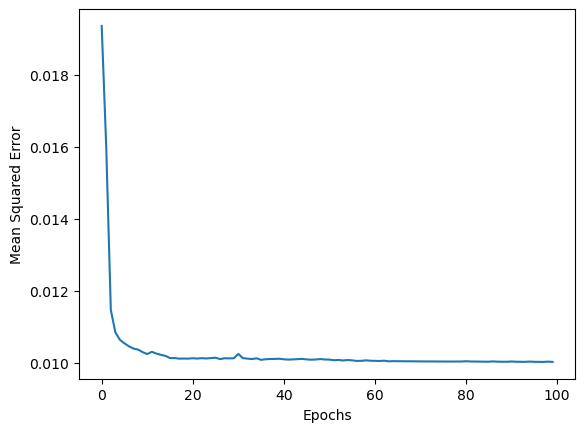

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

Neural Network 2

---


epochs 100


---


lr 0.01


---


2 hidden layers with lesser neurons


---


3 input variables

---

Sigmoid instead of Identity

In [ ]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(3,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


C:\Users\mikec\AppData\Local\Temp\ipykernel_28240\2858472658.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.017227115109562874
Loss: 0.009758018888533115
Loss: 0.009389026090502739
Loss: 0.009238574653863907
Loss: 0.009145181626081467
Loss: 0.009031933732330799
Loss: 0.009016929194331169
Loss: 0.009002313949167728
Loss: 0.008956820704042912
Loss: 0.008968205191195011


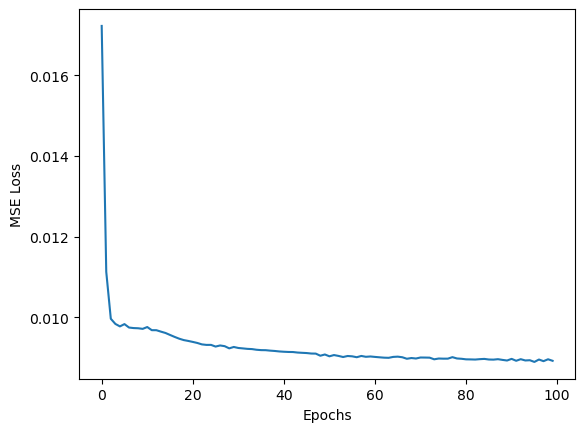

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

Neural Network 3

---


epochs 100


---


lr 0.01


---


2 hidden layers with lesser neurons


---


3 input variables


---

L1 loss

In [ ]:

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(3,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.L1Loss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


C:\Users\mikec\AppData\Local\Temp\ipykernel_28240\3929676271.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.11089208722114563
Loss: 0.08389198035001755
Loss: 0.0806160643696785
Loss: 0.08023862540721893
Loss: 0.08012617379426956
Loss: 0.08041206002235413
Loss: 0.07953687757253647
Loss: 0.07917364686727524
Loss: 0.07997148483991623
Loss: 0.08100759238004684


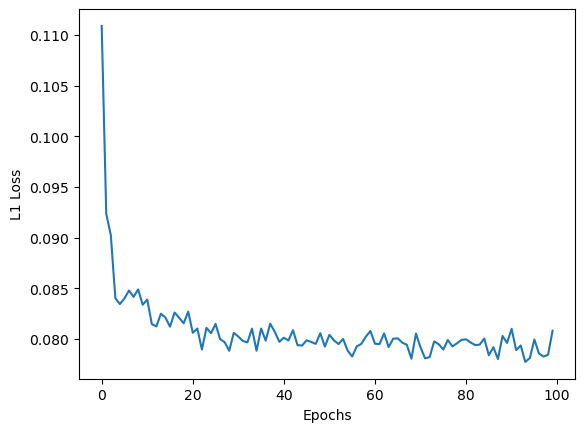

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

Neural Network 4

---


epochs 100


---


lr 0.01


---


2 hidden layers


---


3 input variables


---

L1 loss

---
Sigmoid instead og Identity


In [ ]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(3,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_mse = torch.nn.L1Loss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


C:\Users\mikec\AppData\Local\Temp\ipykernel_28240\861055069.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.11533298343420029
Loss: 0.07918699085712433
Loss: 0.07487919181585312
Loss: 0.07436898350715637
Loss: 0.07340933382511139
Loss: 0.07465796917676926
Loss: 0.07361643761396408
Loss: 0.07369274646043777
Loss: 0.07398796826601028
Loss: 0.07419703900814056


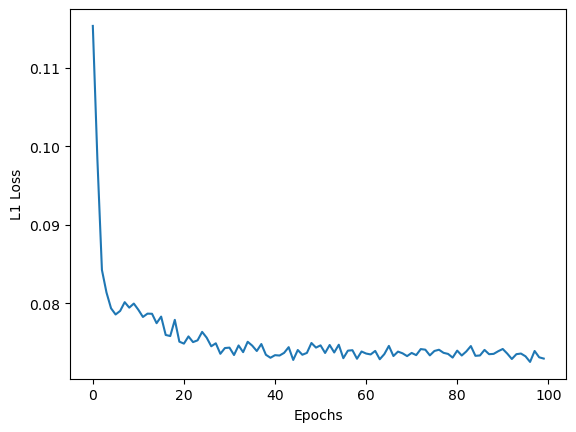

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

Neural Network 5

---


epochs 100


---


lr 0.005


---


3 hidden layers


---


3 input variables


---

Sigmoid

In [ ]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.005
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(3,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
loss_MSE = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_MSE(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")

C:\Users\mikec\AppData\Local\Temp\ipykernel_28240\1522072318.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.027143530547618866
Loss: 0.009348032996058464
Loss: 0.009364004246890545
Loss: 0.009317551739513874
Loss: 0.009313621558248997
Loss: 0.00928287860006094
Loss: 0.009306554682552814
Loss: 0.009319333359599113
Loss: 0.009263460524380207
Loss: 0.009093953296542168


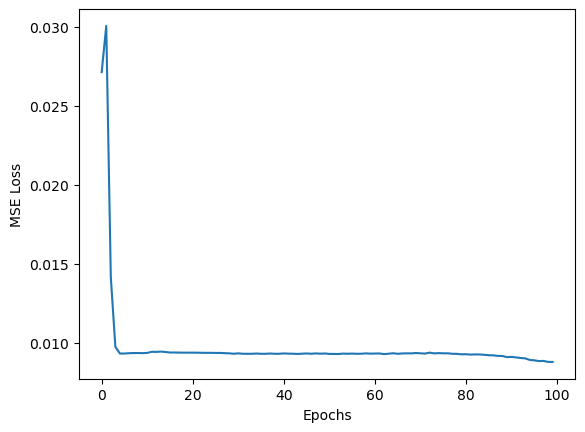

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

#From changing the hyper-parameters, learning rate and hidden layers, it seems like Neural Network 2 had the best performance, as the loss seemed to steadily decent and not give a confusing result. 